# load in detrended LCs

In [69]:
def plot_detrended_lc(xs, ys, yerrs, detrend_labels, t0s_in_data, window, period, colors, duration, depth=None, figname=None, title = None):
    '''
    inputs:
    x = times
    ys = [detrended light curves] of length N number of detrendings
    detrend_labels = [detrending type] of length N number of detrendings
    t0s_in_data = midtransits in data
    window = what fraction of the period to plot on either side of transit (ie. window=1/2 means 1/2 period on either side)
    period = planet period to define plotting limit
    colors = [colors] of length N number of detrendings
    figname = Name of file if you want to save figure
    
    return:
    None
    
    
    
    
    
    '''
    import math    
        

            
    transit_windows = []
    for t0 in t0s_in_data:
        transit_windows.append([t0 - 1.1*duration/(2*24.), t0 + 1.1*duration/(2*24.)])

    
    n_transit = np.arange(0, len(t0s_in_data), 1)
    
    if len(t0s_in_data) > 1:

        if len(ys) == 1:
            fig, ax = plt.subplots(ncols = 3, nrows = math.ceil(len(t0s_in_data)/3), figsize = [23,1.5*len(t0s_in_data)*len(ys)], sharey=True)    
        else:
            fig, ax = plt.subplots(ncols = 3, nrows = math.ceil(len(t0s_in_data)/3), figsize = [23,1.5*len(t0s_in_data)*len(ys)/4], sharey=True)

    else:
        fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = [23/3,1.8*len(ys)], sharey=True)

    
    y_detrend = []
    
    
    if not depth:
        depth = 0.01
    
    if len(t0s_in_data) > 1:
        column = 0
        row = 0
        
    
        for ii in range(0, len(t0s_in_data)):
            ax_ii = ax[row][column]

            t0 = t0s_in_data[ii]
            
            
            detrend_offset = 0
            for detrend_index in range(0, len(ys)):
        
                y_detrend = ys[detrend_index]
                x = xs[detrend_index]
                yerr = yerrs[detrend_index]
                
                ax_ii.errorbar(x, y_detrend + detrend_offset, yerr=yerr, marker='o', ls='', 
                               color = colors[detrend_index], alpha = 0.63)
                
                ax_ii.text(t0-(period*window)+.018, detrend_offset+.0013, 
                       detrend_labels[detrend_index], 
                       color=colors[detrend_index], fontsize=18)
                
                detrend_offset += depth
                
                
            ax_ii.axvline(transit_windows[ii][0], linewidth=1.8, color='k', alpha = 0.79, ls='--') 
            ax_ii.axvline(transit_windows[ii][1], linewidth=1.8, color='k', alpha = 0.79, ls='--')

            ax_ii.set_xlabel("Time [KBJD]", fontsize = 27)
            ax_ii.set_ylabel("Intensity", fontsize = 27)
            ax_ii.set_xlim(t0-(period*window), t0+(period*window))
            ax_ii.set_ylim(-1.2*depth, depth*len(ys))
            #ax_ii.tick_params(axis='x', rotation=45)
            
            return_obj = fig, ax
            
    
    

            

            if column == 2:
                column = 0
                row += 1
            else:
                column += 1


    else:
        t0 = t0s_in_data[0]
        detrend_offset = 0
        for detrend_index in range(0, len(ys)):

            y_detrend = ys[detrend_index]
            x = xs[detrend_index]
            yerr = yerrs[detrend_index]

            ax.errorbar(x, y_detrend + detrend_offset, yerr=yerr, marker='o', ls='', 
                        color = colors[detrend_index], alpha = 0.72, markersize=9)
            
            ax.text(t0-(period*window)+.018, detrend_offset+.0081, 
                    detrend_labels[detrend_index], 
                    color=colors[detrend_index], fontsize=15)

            detrend_offset += depth

        [ax.axvline(transit[0], linewidth=1.8, color='k', alpha = 0.79, ls='--') for transit in transit_windows]
        [ax.axvline(transit[1], linewidth=1.8, color='k', alpha = 0.79, ls='--') for transit in transit_windows]
        ax.set_xlabel("Time [KBJD]", fontsize = 27)
        #ax.set_ylabel("intensity", fontsize = 27)
        ax.set_xlim(t0-(period*window), t0+(period*window))


        ax.set_ylim(-.8*depth, .95*depth*len(ys))
        #ax.tick_params(axis='x', rotation=45)
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        ax.ticklabel_format(useOffset=False)
        
        return_obj = ax

        
                            

    
        
    
    if title:
        fig.suptitle(title, fontsize = 36, y=1.01)
    
    
    
    #fig.delaxes(ax[1][4])
    fig.tight_layout()
        
    if figname:
        fig.savefig(figname, bbox_inches='tight')
        
        
    
    

    
    return return_obj





In [40]:
import pandas as pd

kepler_pdc = pd.read_csv('detrended_Kepler_PDC.csv', delimiter=',')
kepler_sap = pd.read_csv('detrended_Kepler_PDC.csv', delimiter=',')
TESS = pd.read_csv('detrended_TESS.csv', delimiter=',')

TESS['time'] -= 2454833




In [41]:
import pandas as pd

kepler_mm = pd.read_csv('mm_kipping_kepler.dat', delimiter='\t', header=None, names=['time', 'flux', 'flux_err'])
tess_mm = pd.read_csv('mm_kipping_tess.dat', delimiter=' ', header=None, names=['time', 'flux', 'flux_err'])


x_kepler_mm, y_kepler_mm, yerr_kepler_mm = kepler_mm['time']+2400000-2454833, kepler_mm['flux']-1, kepler_mm['flux_err']
x_tess_mm, y_tess_mm, yerr_tess_mm = tess_mm['time']+2400000-2454833, tess_mm['flux']-1, tess_mm['flux_err']



In [42]:
import numpy as np

x_det = np.concatenate([kepler_pdc['time'].values,
                        TESS['time'].values])



yerr_detrended = np.concatenate([kepler_pdc['yerr'].values,
                                 TESS['yerr'].values])

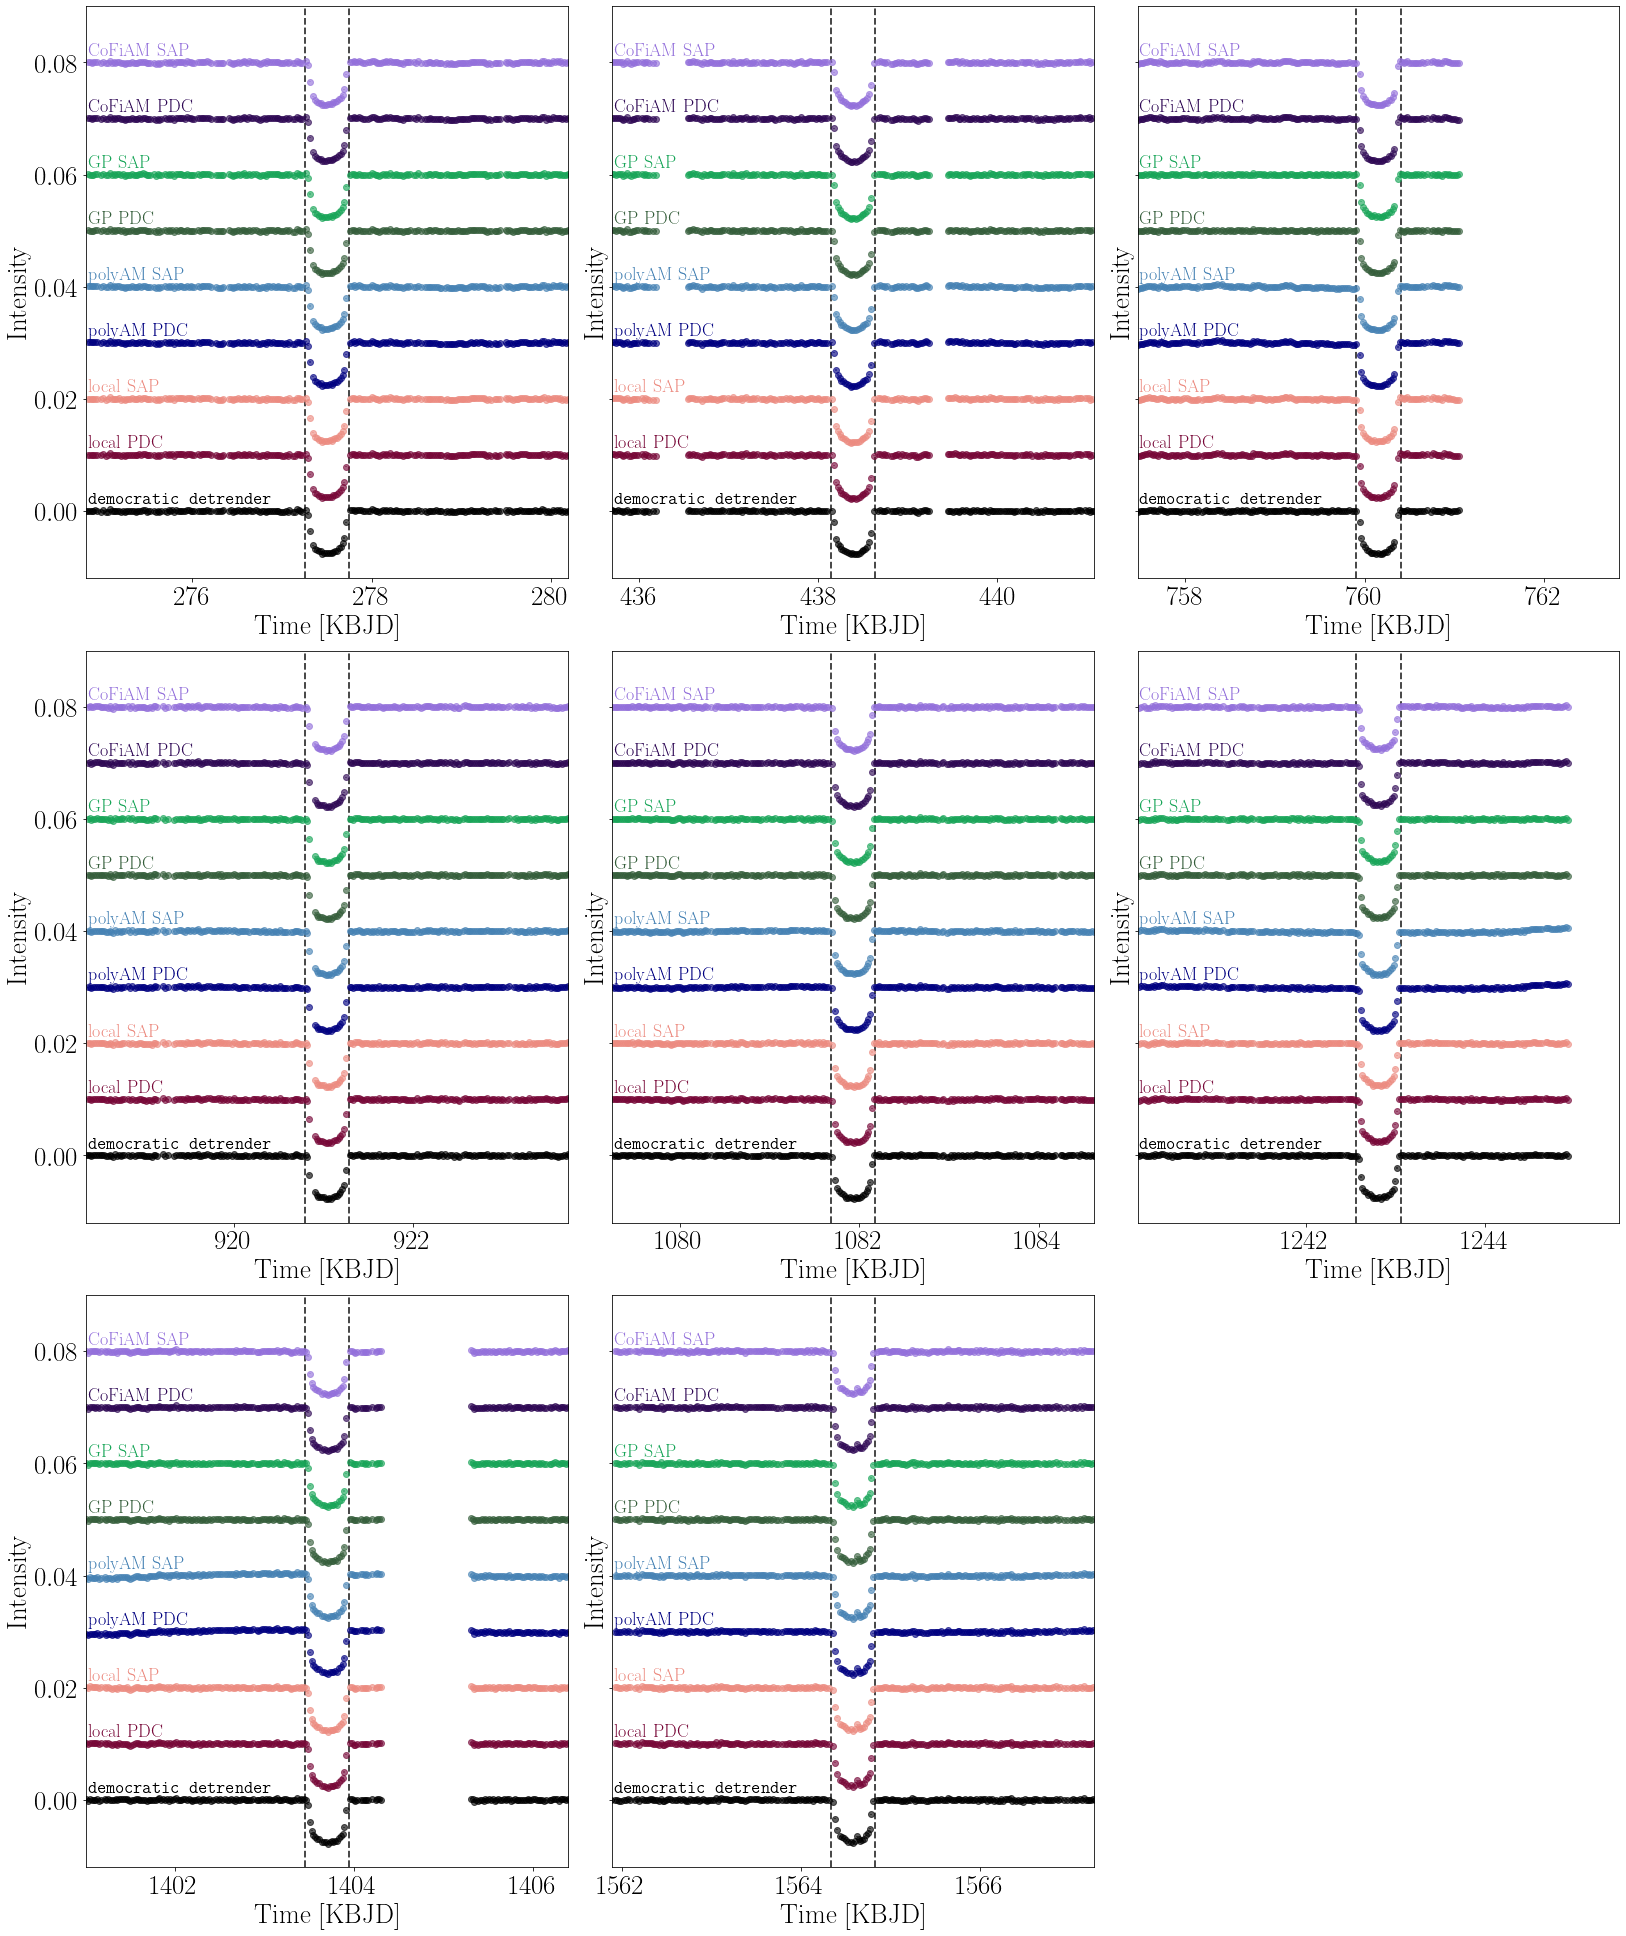

In [43]:
import matplotlib.pyplot as plt

import matplotlib 
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


# load in the t0s
t0s = np.genfromtxt('t0s_all.txt', delimiter=',')
if t0s.ndim == 0:
    t0s = np.array([t0s])
    
t0s = t0s[:-1]
period = 160.884
duration = 10.7536
# # now to plot!

green2, green1 = '#355E3B', '#18A558'
blue2, blue1 = '#000080', '#4682B4'
purple2, purple1 = '#2E0854','#9370DB'
red2, red1 = '#770737', '#EC8B80'

colors = ['k',
          red2, red1,
          blue2, blue1,
          green2, green1,
          purple2, purple1]

y_detrended = [y_kepler_mm.values,
               kepler_pdc['local'], kepler_sap['local'],
               kepler_pdc['polyAM'], kepler_sap['polyAM'],
               kepler_pdc['GP'], kepler_sap['GP'],
               kepler_pdc['CoFiAM'], kepler_sap['CoFiAM'],
              ]

x_detrended = [x_kepler_mm.values,
               kepler_pdc['time'], kepler_sap['time'],
               kepler_pdc['time'], kepler_sap['time'],
               kepler_pdc['time'], kepler_sap['time'],
               kepler_pdc['time'], kepler_sap['time']]

yerr_detrended = [yerr_kepler_mm.values,
                  kepler_pdc['yerr'], kepler_sap['yerr'],
                  kepler_pdc['yerr'], kepler_sap['yerr'],
                  kepler_pdc['yerr'], kepler_sap['yerr'],
                  kepler_pdc['yerr'], kepler_sap['yerr']]

detrend_label = [r'\texttt{democratic detrender}',
                 'local PDC', 'local SAP',
                 'polyAM PDC', 'polyAM SAP',
                 'GP PDC', 'GP SAP', 
                 'CoFiAM PDC', 'CoFiAM SAP']



fig_kepler, ax_kepler = plot_detrended_lc(x_detrended, y_detrended, yerr_detrended, detrend_label, 
                                          t0s[:-1], float(6*duration/(24.))/period, period,
                                          colors, duration, depth=0.01, figname = 'detrended_lc_w_mm.pdf')


# Remove the extra AxesSubplot object from the figure
fig_kepler.delaxes(ax_kepler[2][2])
fig_kepler.savefig('detrended_lc_w_mm.pdf')


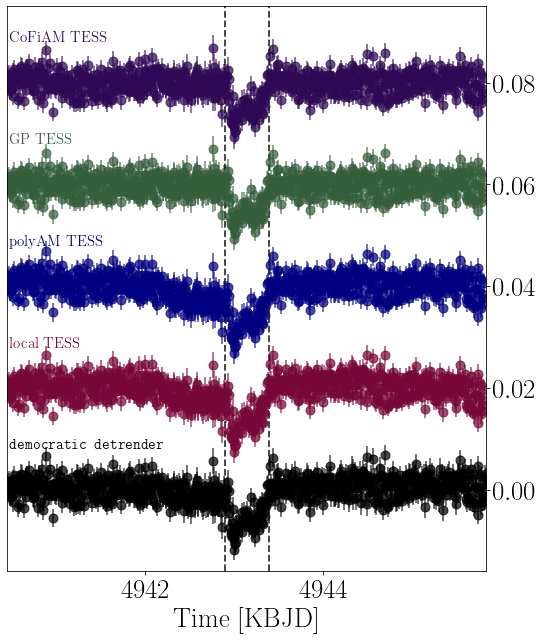

In [71]:
import matplotlib 
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


    
    
period = 160.884
duration = 10.7536
# # now to plot!
green2 = '#355E3B'
blue2 = '#000080'
purple2 = '#2E0854'
red2 = '#770737'

colors = ['k', 
          red2,
          blue2,
          green2,
          purple2]


y_detrended = [y_tess_mm.values, 
               TESS['local'], 
               TESS['polyAM'], 
               TESS['GP'],
               TESS['CoFiAM']]

x_detrended = [x_tess_mm.values, 
               TESS['time'],
               TESS['time'], 
               TESS['time'], 
               TESS['time']]

yerr_detrended = [yerr_tess_mm.values, 
                  TESS['yerr'],
                  TESS['yerr'],
                  TESS['yerr'], 
                  TESS['yerr'],]

detrend_label = [r'\texttt{democratic detrender}', 
                 'local TESS', 
                 'polyAM TESS', 
                 'GP TESS', 
                 'CoFiAM TESS']



ax_extra = plot_detrended_lc(x_detrended, y_detrended, yerr_detrended, detrend_label, 
                             [t0s[-1]], float(6*duration/(24.))/period, period,
                             colors, duration, depth=0.02, figname = 'detrended_lc_new_w_mm.pdf')